# 3. Diversity analysis 

In [1]:
# Load diversity libraries
library(tidyverse)
library(data.table)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(vegan) 
library(phyloseq) 
library(dplyr) 
library(ggpubr) 
library(Hmisc) 
library(corrplot)
library(scales)
library(broom)
library(ecodist) 
library(rstatix)
library(multcompView)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:

In [2]:
# Set seed and your working directory
set.seed(1234) # for reproducibility of random processes
setwd("/home/strawberry/Documents/Collaborations/mangrove/analyses_R")

In [3]:
# Loading frequency table with taxonomic annotation 
ReadCounts_TaxAnnotation <- read.delim("./ReadCounts_TaxAnnotation_SILVA.tsv", h=T) 
head(ReadCounts_TaxAnnotation)

,ID_Sample,id,count,Kingdom,Phylum,Class,Order,Family,Genus,Species,⋯,P,Ca,Mg,K,H.Al,SB,CTC,V.,Number_Reads,AlignmentEfficiency
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,Sample-ID1-A1,AB021368,1,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Microbulbiferaceae,Microbulbifer,Microbulbifer elongatus,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903
2,Sample-ID1-A1,AB189347,1,Bacteria,Planctomycetota,Planctomycetes,Planctomycetales,Rubinisphaeraceae,Planctomicrobium,uncultured Planctomyces sp.,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903
3,Sample-ID1-A1,AB250557,1,Bacteria,Gemmatimonadota,BD2-11 terrestrial group,Incertae Sedis,Incertae Sedis,Incertae Sedis,uncultured bacterium,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903
4,Sample-ID1-A1,AB294923,1,Bacteria,Gemmatimonadota,PAUC43f marine benthic group,Incertae Sedis,Incertae Sedis,Incertae Sedis,uncultured Gemmatimonadetes bacterium,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903
5,Sample-ID1-A1,AB294925,1,Bacteria,Thermodesulfobacteriota,Desulfobulbia,Desulfobulbales,Desulfocapsaceae,Incertae Sedis,uncultured Desulfobulbaceae bacterium,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903
6,Sample-ID1-A1,AB294930,1,Bacteria,Acidobacteriota,Subgroup 22,Incertae Sedis,Incertae Sedis,Incertae Sedis,uncultured Acidobacteria bacterium,⋯,24,58,56,12.6,9,126.6,135,94,1134,96.64903


In [4]:
# Preprocessing  
df <- aggregate(ReadCounts_TaxAnnotation$count, 
      list(ReadCounts_TaxAnnotation$Genus, ReadCounts_TaxAnnotation$ID_Sample), # groups the data by Genus and ID_Sample
      FUN=sum) # calculate total reads per genus in each sample
head(df)

colnames(df) <- c("Genus", "ID_Sample", "Counts") # asigns names to cols
cast_data = acast(df, ID_Sample ~ Genus) # transform df into a wide-format matrix; rows represent samples, and columns represent Genus
cast_data[is.na(cast_data)] <- 0 # Replacing missing values (NA) with zeros
head(cast_data)

,Group.1,Group.2,x
,<chr>,<chr>,<int>
1,Acidaminobacter,Sample-ID1-A1,2
2,Actibacter,Sample-ID1-A1,4
3,Actibacterium,Sample-ID1-A1,4
4,Aestuariivita,Sample-ID1-A1,2
5,Alcanivorax,Sample-ID1-A1,1
6,Aliiroseovarius,Sample-ID1-A1,1


Using Counts as value column: use value.var to override.



,3PJM14,Acanthopleuribacter,Acetoanaerobium,Acetobacterium,Achromobacter,Acidaminobacter,Acidihalobacter,Acinetobacter,Actibacter,Actibacterium,⋯,Verruc-01,Vibrio,Vicingus,Vulgatibacter,wb1-P19,WCHB1-32,Woeseia,Yoonia,Zag_111,Zeaxanthinibacter
Sample-ID1-A1,0,0,0,0,0,2,0,0,4,4,⋯,1,0,1,1,0,0,73,0,0,1
Sample-ID2-A2,1,0,0,0,0,1,0,0,4,3,⋯,0,0,3,0,0,0,122,0,0,3
Sample-ID3-A3,0,0,0,0,0,0,0,0,3,2,⋯,0,0,3,0,1,0,40,5,0,0
Sample-ID4-A4,0,0,0,0,0,0,0,0,0,3,⋯,1,3,0,0,0,0,33,0,0,1
Sample-ID5-B1,0,1,0,0,0,0,0,0,2,2,⋯,0,0,0,0,0,0,44,0,0,0
Sample-ID6-B2,0,1,0,1,0,1,0,1,1,3,⋯,3,21,2,0,0,0,79,1,0,0


Rarefaction depth: 956 


png 
  3

pdf 
  2

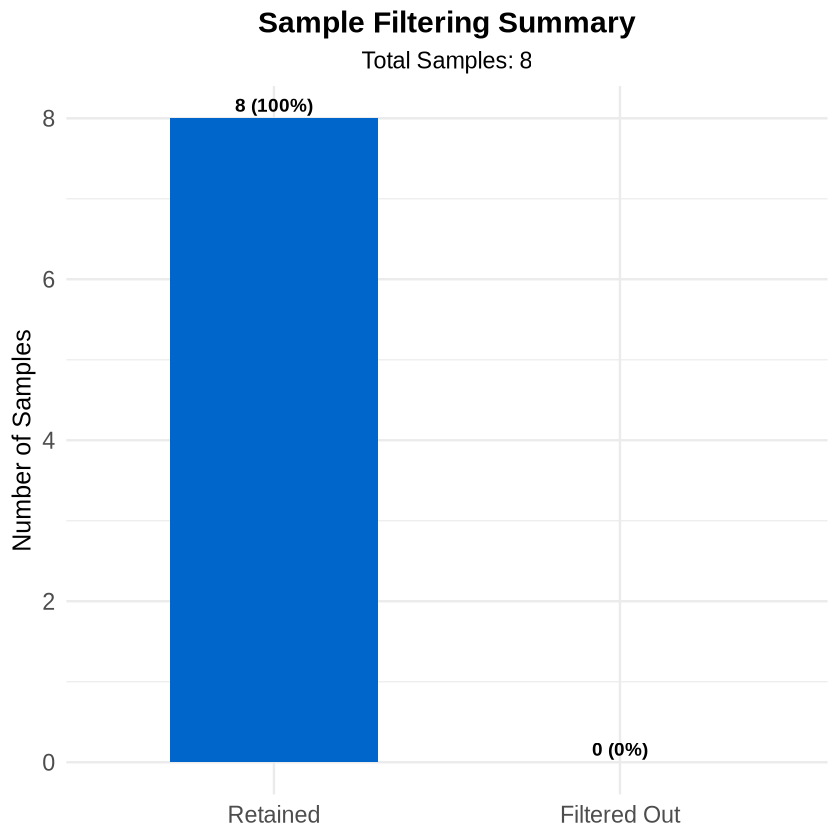

In [7]:
## Computing rarefaction depth
### Computes the total number of reads per sample and finds the sample with the lowest sequencing depth (used for rarefaction)
raremax <- min(rowSums(cast_data)) 
cat("Rarefaction depth:", raremax, "\n") 

## Compute total reads per sample
total_reads <- rowSums(cast_data)

## Count number of samples before and after filtering
samples_before <- nrow(cast_data)
samples_after <- sum(total_reads >= 956)
samples_removed <- samples_before - samples_after

## Create a df for plotting
filter_summary <- data.frame(
  Category = c("Retained", "Filtered Out"),
  Sample_Count = c(samples_after, samples_removed)
)

## Compute percentage and plot 
filter_summary$Percentage <- (filter_summary$Sample_Count / samples_before) * 100

ggplot(filter_summary, aes(x = reorder(Category, -Sample_Count), y = Sample_Count, fill = Percentage)) +
  geom_bar(stat = "identity", width = 0.6, show.legend = FALSE) +
  geom_text(aes(label = paste0(Sample_Count, " (", round(Percentage, 1), "%)")),
            vjust = -0.5, size = 4, fontface = "bold") +
  scale_fill_gradient(low = "#FF9999", high = "#0066CC") +
  theme_minimal(base_size = 15) +
  labs(title = "Sample Filtering Summary",
       subtitle = paste("Total Samples:", samples_before),
       x = NULL, y = "Number of Samples") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 18),
        plot.subtitle = element_text(hjust = 0.5, size = 14),
        axis.text = element_text(size = 14))

# Save the plot as a PNG file
dev.copy(png, filename = "sample_filt_summary.png", width = 1600, height = 1600, res = 300)
dev.off()  # Close the PNG device

In [9]:
## Filter out samples with fewer than 956 reads and remove those samples from metadata
filtered_cast_data <- cast_data[total_reads >= 956, ]
metadata <- read.delim("./metadata_full_clean.tsv", h=T)
metadata_filtered <- metadata %>% filter(ID_Sample %in% rownames(filtered_cast_data))
metadata_filtered <- metadata_filtered[!duplicated(metadata_filtered$ID_Sample), ] # ensures no duplicate files are used in downstream processing
head(filtered_cast_data)
print(metadata_filtered)

,3PJM14,Acanthopleuribacter,Acetoanaerobium,Acetobacterium,Achromobacter,Acidaminobacter,Acidihalobacter,Acinetobacter,Actibacter,Actibacterium,⋯,Verruc-01,Vibrio,Vicingus,Vulgatibacter,wb1-P19,WCHB1-32,Woeseia,Yoonia,Zag_111,Zeaxanthinibacter
Sample-ID1-A1,0,0,0,0,0,2,0,0,4,4,⋯,1,0,1,1,0,0,73,0,0,1
Sample-ID2-A2,1,0,0,0,0,1,0,0,4,3,⋯,0,0,3,0,0,0,122,0,0,3
Sample-ID3-A3,0,0,0,0,0,0,0,0,3,2,⋯,0,0,3,0,1,0,40,5,0,0
Sample-ID4-A4,0,0,0,0,0,0,0,0,0,3,⋯,1,3,0,0,0,0,33,0,0,1
Sample-ID5-B1,0,1,0,0,0,0,0,0,2,2,⋯,0,0,0,0,0,0,44,0,0,0
Sample-ID6-B2,0,1,0,1,0,1,0,1,1,3,⋯,3,21,2,0,0,0,79,1,0,0


      ID_Sample   Mangrove Collection_month  pH OM  P  Ca  Mg    K H.Al    SB
1 Sample-ID1-A1      Araçá        September 7.3 10 24  58  56 12.6    9 126.6
2 Sample-ID2-A2      Araçá        September 7.3 10 24  58  56 12.6    9 126.6
3 Sample-ID3-A3      Araçá        September 7.3 10 24  58  56 12.6    9 126.6
4 Sample-ID4-A4      Araçá        September 7.3 10 24  58  56 12.6    9 126.6
5 Sample-ID5-B1 Colhereiro          October 7.8 47 33 122 133 26.4    9 281.4
6 Sample-ID6-B2 Colhereiro          October 7.8 47 33 122 133 26.4    9 281.4
7 Sample-ID7-B3 Colhereiro          October 7.8 47 33 122 133 26.4    9 281.4
8 Sample-ID8-B4 Colhereiro          October 7.8 47 33 122 133 26.4    9 281.4
  CTC V. Number_Reads
1 135 94         1134
2 135 94         2971
3 135 94         1882
4 135 94          965
5 289 97         1686
6 289 97         2375
7 289 97         1231
8 289 97         1693


In [10]:
# Rarefaction
raremax = 956  
rarefied_data <- rrarefy(filtered_cast_data, raremax)
head(rarefied_data)

,3PJM14,Acanthopleuribacter,Acetoanaerobium,Acetobacterium,Achromobacter,Acidaminobacter,Acidihalobacter,Acinetobacter,Actibacter,Actibacterium,⋯,Verruc-01,Vibrio,Vicingus,Vulgatibacter,wb1-P19,WCHB1-32,Woeseia,Yoonia,Zag_111,Zeaxanthinibacter
Sample-ID1-A1,0,0,0,0,0,1,0,0,4,3,⋯,1,0,1,1,0,0,60,0,0,1
Sample-ID2-A2,1,0,0,0,0,0,0,0,3,1,⋯,0,0,1,0,0,0,42,0,0,2
Sample-ID3-A3,0,0,0,0,0,0,0,0,0,2,⋯,0,0,2,0,1,0,28,4,0,0
Sample-ID4-A4,0,0,0,0,0,0,0,0,0,3,⋯,1,3,0,0,0,0,33,0,0,1
Sample-ID5-B1,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,30,0,0,0
Sample-ID6-B2,0,1,0,0,0,1,0,1,0,3,⋯,1,11,0,0,0,0,31,0,0,0


In [ ]:
write.table(rarefied_data, file = "rarefied_data.tsv", sep = "\t", row.names = FALSE)

png 
  3

pdf 
  2

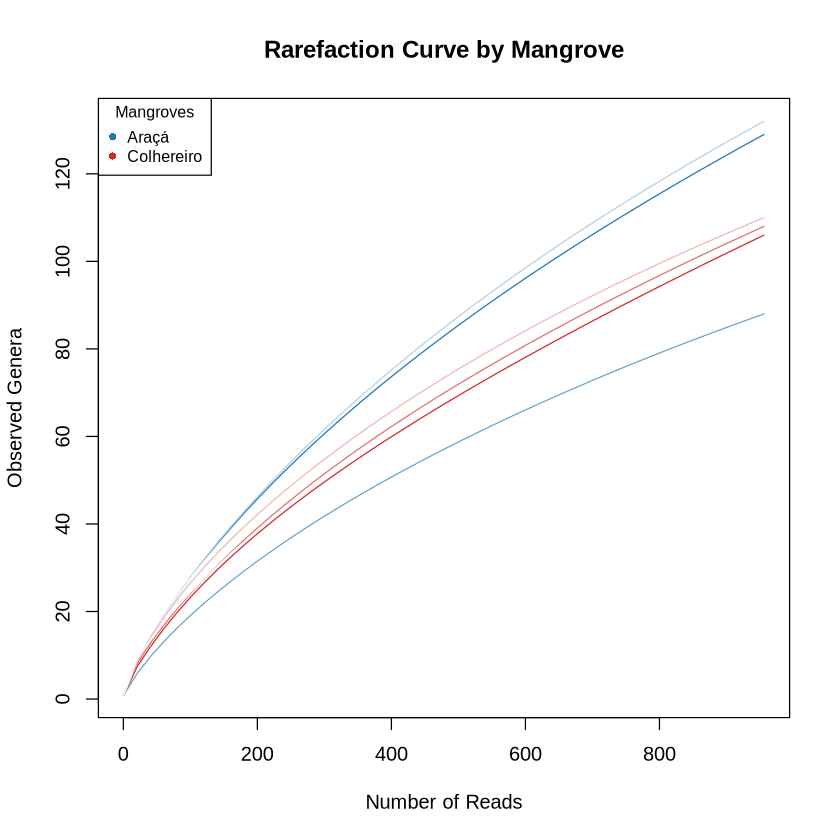

In [13]:
# Define distinct base colors for each mangrove
mangrove_colors <- c("Araçá" = "#1f77b4",        # Blue
                     "Colhereiro" = "#d62728")   # Red

# Create a vector mapping sample IDs to their mangrove group
mangrove <- metadata_filtered$Mangrove
names(mangrove) <- metadata_filtered$ID_Sample

# Generate one gradient per mangrove and assign to samples
sample_colors <- unlist(lapply(unique(mangrove), function(tp) {
  samples_in_group <- names(mangrove[mangrove == tp])
  n <- length(samples_in_group)
  gradient_colors <- colorRampPalette(c(mangrove_colors[tp], "white"))(n)
  names(gradient_colors) <- samples_in_group
  gradient_colors
}))

# Make sure sample colors are ordered to match rarefied_data
sample_ids <- rownames(rarefied_data)
sample_colors_ordered <- sample_colors[sample_ids]

# Plot rarefaction curves
par(mfrow = c(1,1))
rarecurve(rarefied_data,
          step = 20,
          col = sample_colors_ordered,
          label = FALSE,
          main = "Rarefaction Curve by Mangrove",
          xlab = "Number of Reads",
          ylab = "Observed Genera")

# Add legend for mangrove colors
legend("topleft",
       legend = names(mangrove_colors),
       col = mangrove_colors,
       cex = 0.8,
       pch = 16,
       title = "Mangroves")

# Save the plot
dev.copy(png, filename = "rarefaction_curve.png", width = 1800, height = 1200, res = 300)
dev.off()

In [14]:
write.table(rarefied_data, "rarefied_data.tsv", quote = F, sep = "\t", row.names = T)
write.table(metadata_filtered, "metadata_filtered_Diversity.tsv", quote = F, sep = "\t", row.names = T)

In [15]:
## Create color palette
purples <- brewer.pal(n = 5, name = "BuPu")[-c(1:4)] # taking a few colors from the RColorBrewer Package
blues <- rev(brewer.pal(n = 5, name = "Blues")[-1])
greens <- brewer.pal(n = 5, name = "YlGn")[-1]
oranges <- c("#FFEC8B", "#FECC5C", "#fe9a4d", "#fe6f01") # appending some nice oranges, reds, purples, beiges and aquamarines
reds <- c("#b30024", "#ff0033", "#ff554d", "#ff9e99")
purples <- append(purples, c("#ac39ac", "#cc66cc", "#ffb3ff"))
beiges <- c("#999966", "#adad85", "#ccccb3")
aquamarines <- c("#25a696", "#43d6c5", "#96e8df")
pinks <- c("#9F2B68", "#F33A6A")
gray <- c("#808080")
custom_colors <- c(blues, reds, oranges, greens, purples, rev(beiges), aquamarines, pinks) # combinig all colors in a single vector

In [16]:
OTU = otu_table(rarefied_data, taxa_are_rows = FALSE) 
sampledata = sample_data(metadata_filtered) 
rownames(sampledata) <- sampledata$ID_Sample 
sampledata <- sampledata[,-1] # Remove ID_Sample column to avoid redundancy

print(head(OTU))
print(head(sampledata))

OTU Table:          [440 taxa and 6 samples]
                     taxa are columns
              3PJM14 Acanthopleuribacter Acetoanaerobium Acetobacterium
Sample-ID1-A1      0                   0               0              0
Sample-ID2-A2      1                   0               0              0
Sample-ID3-A3      0                   0               0              0
Sample-ID4-A4      0                   0               0              0
Sample-ID5-B1      0                   0               0              0
Sample-ID6-B2      0                   1               0              0
              Achromobacter Acidaminobacter Acidihalobacter Acinetobacter
Sample-ID1-A1             0               1               0             0
Sample-ID2-A2             0               0               0             0
Sample-ID3-A3             0               0               0             0
Sample-ID4-A4             0               0               0             0
Sample-ID5-B1             0               0

In [17]:
## Compute alpha diversity indices
physeq1 = phyloseq(OTU,sampledata) # Create phyloseq object
richness <- estimate_richness(physeq1) # Compute alpha diversity indices
richness$ID_Sample <- rownames(richness)  # Retain sample names

write.table(richness, "AlhaDiversity_Indexes.tsv", quote = F, sep = "\t", row.names = F)

In [20]:
richness

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher,ID_Sample
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Sample.ID1.A1,129,304.5556,57.90273,301.6286,10.252662,2.330458,0.6511397,2.866477,40.17989,Sample.ID1.A1
Sample.ID2.A2,88,166.0000,29.86346,202.6507,9.275778,1.555496,0.4539640,1.831381,23.62503,Sample.ID2.A2
Sample.ID3.A3,132,269.3913,43.33593,294.1532,10.904437,2.390405,0.6780322,3.105900,41.52178,Sample.ID3.A3
Sample.ID4.A4,116,246.0000,46.64899,219.7504,8.645952,2.241950,0.6196517,2.629169,34.57313,Sample.ID4.A4
Sample.ID5.B1,106,307.2500,75.11256,312.9239,11.590851,2.127392,0.6675084,3.007595,30.48753,Sample.ID5.B1
Sample.ID6.B2,108,234.1765,44.57571,255.8794,10.230601,2.363106,0.7557181,4.093632,31.28897,Sample.ID6.B2
Sample.ID7.B3,110,206.3158,34.30951,222.1029,9.212603,2.404352,0.7197572,3.568334,32.09823,Sample.ID7.B3
Sample.ID8.B4,107,383.1111,110.26892,318.5604,11.208544,2.617728,0.8306927,5.906421,30.88727,Sample.ID8.B4


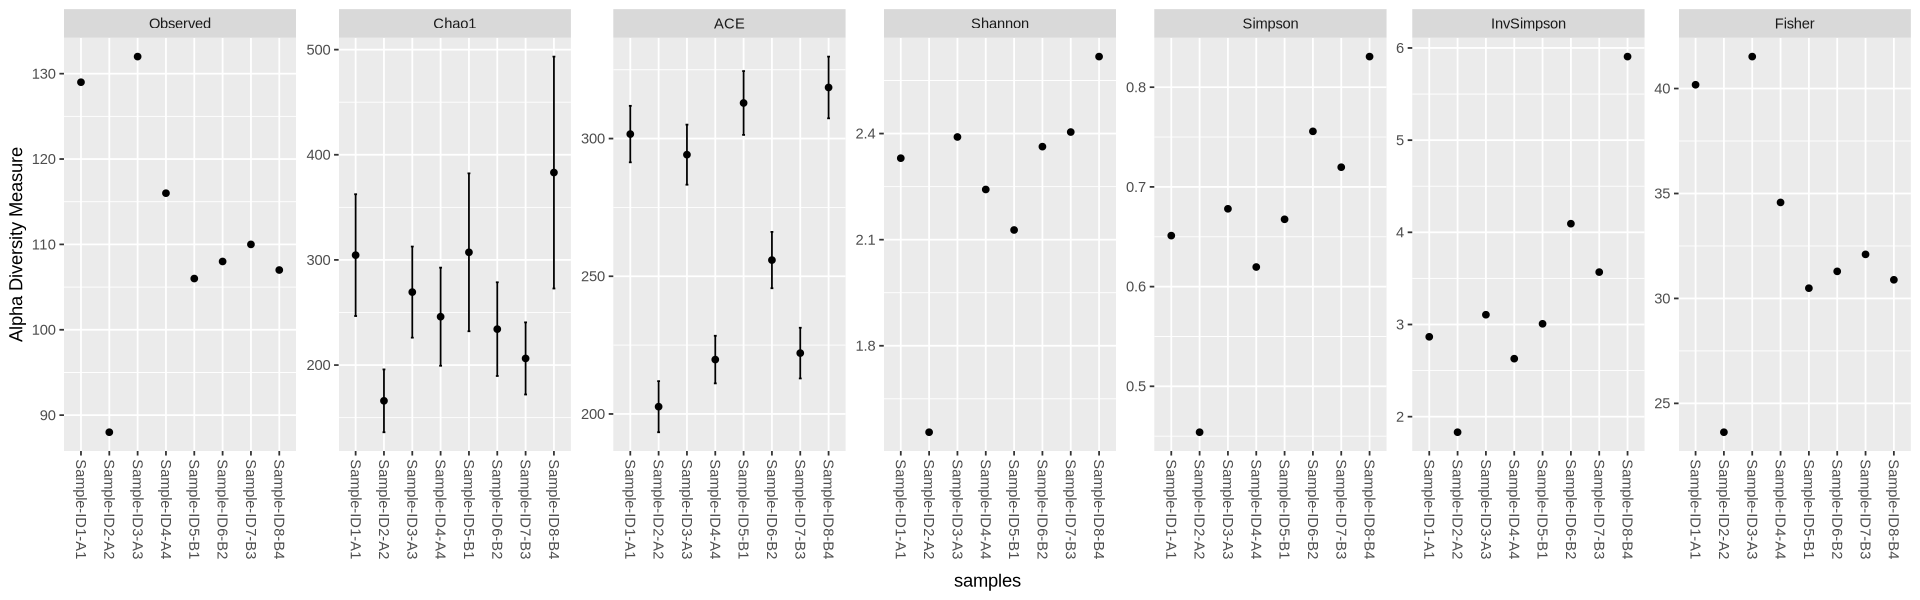

In [18]:
## Plot alpha diversity without grouping 
options(repr.plot.width=16, repr.plot.height=5) 
plot_richness(physeq1, )

In [22]:
metadata_filtered

,ID_Sample,Mangrove,Collection_month,pH,OM,P,Ca,Mg,K,H.Al,SB,CTC,V.,Number_Reads
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,Sample-ID1-A1,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,1134
2,Sample-ID2-A2,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,2971
3,Sample-ID3-A3,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,1882
4,Sample-ID4-A4,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,965
5,Sample-ID5-B1,Colhereiro,October,7.8,47,33,122,133,26.4,9,281.4,289,97,1686
6,Sample-ID6-B2,Colhereiro,October,7.8,47,33,122,133,26.4,9,281.4,289,97,2375
7,Sample-ID7-B3,Colhereiro,October,7.8,47,33,122,133,26.4,9,281.4,289,97,1231
8,Sample-ID8-B4,Colhereiro,October,7.8,47,33,122,133,26.4,9,281.4,289,97,1693


In [23]:
# Fix the ID_Sample format in richness to match metadata
richness <- richness %>%
  mutate(ID_Sample = gsub("\\.", "-", ID_Sample))

# Join richness with metadata to get the Mangrove column
richness2 <- richness %>%
  left_join(metadata_filtered %>% select(ID_Sample, Mangrove), by = "ID_Sample")
print(richness2)

  Observed    Chao1  se.chao1      ACE    se.ACE  Shannon   Simpson InvSimpson
1      129 304.5556  57.90273 301.6286 10.252662 2.330458 0.6511397   2.866477
2       88 166.0000  29.86346 202.6507  9.275778 1.555496 0.4539640   1.831381
3      132 269.3913  43.33593 294.1532 10.904437 2.390405 0.6780322   3.105900
4      116 246.0000  46.64899 219.7504  8.645952 2.241950 0.6196517   2.629169
5      106 307.2500  75.11256 312.9239 11.590851 2.127392 0.6675084   3.007595
6      108 234.1765  44.57571 255.8794 10.230601 2.363106 0.7557181   4.093632
7      110 206.3158  34.30951 222.1029  9.212603 2.404352 0.7197572   3.568334
8      107 383.1111 110.26892 318.5604 11.208544 2.617728 0.8306927   5.906421
    Fisher     ID_Sample   Mangrove
1 40.17989 Sample-ID1-A1      Araçá
2 23.62503 Sample-ID2-A2      Araçá
3 41.52178 Sample-ID3-A3      Araçá
4 34.57313 Sample-ID4-A4      Araçá
5 30.48753 Sample-ID5-B1 Colhereiro
6 31.28897 Sample-ID6-B2 Colhereiro
7 32.09823 Sample-ID7-B3 Colhereiro
8

In [28]:
# Function to perform Wilcoxon test and create boxplots for different alpha diversity metrics
plot_alpha_diversity <- function(metric) {
    # Perform Wilcoxon test for the chosen metric (unpaired)
    wilcox_test_result <- richness2 %>%
        select(ID_Sample, Mangrove, !!sym(metric)) %>%
        mutate(Metric = as.numeric(!!sym(metric))) %>%
        pairwise_wilcox_test(Metric ~ Mangrove, paired = FALSE, p.adjust.method = "bonferroni")
    
    print(wilcox_test_result)  # Show test result

    # Plot boxplot
    plot <- ggplot(richness2, aes(x = Mangrove, y = !!sym(metric), fill = Mangrove)) +
        geom_boxplot(alpha = 0.3) +
        geom_jitter(width = 0.2, size = 2, alpha = 0.6) +
        labs(title = paste("Alpha Diversity Metric:", metric),
             y = metric,
             x = "Mangrove") +
        theme_minimal() +
        scale_fill_brewer(palette = "Set2")

    print(plot)
}

# A tibble: 1 × 9
  .y.    group1 group2        n1    n2 statistic     p p.adj p.adj.signif
* <chr>  <chr>  <chr>      <int> <int>     <dbl> <dbl> <dbl> <chr>       
1 Metric Araçá  Colhereiro     4     4         4 0.343 0.343 ns          


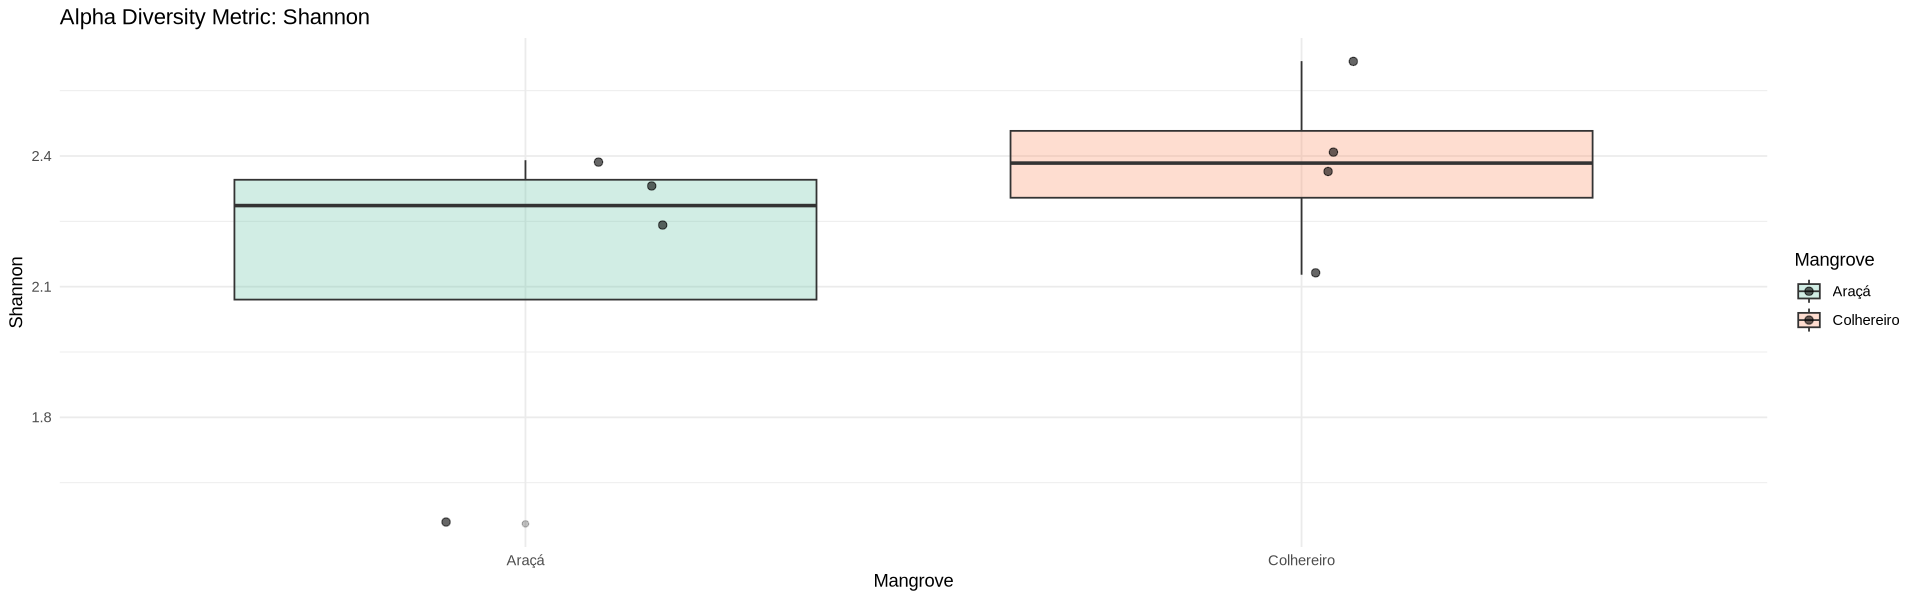

In [29]:
plot_alpha_diversity("Shannon")

In [31]:
library(patchwork)

# A tibble: 1 × 9
  .y.    group1 group2        n1    n2 statistic     p p.adj p.adj.signif
* <chr>  <chr>  <chr>      <int> <int>     <dbl> <dbl> <dbl> <chr>       
1 Metric Araçá  Colhereiro     4     4         4 0.343 0.343 ns          
# A tibble: 1 × 9
  .y.    group1 group2        n1    n2 statistic     p p.adj p.adj.signif
* <chr>  <chr>  <chr>      <int> <int>     <dbl> <dbl> <dbl> <chr>       
1 Metric Araçá  Colhereiro     4     4         6 0.686 0.686 ns          


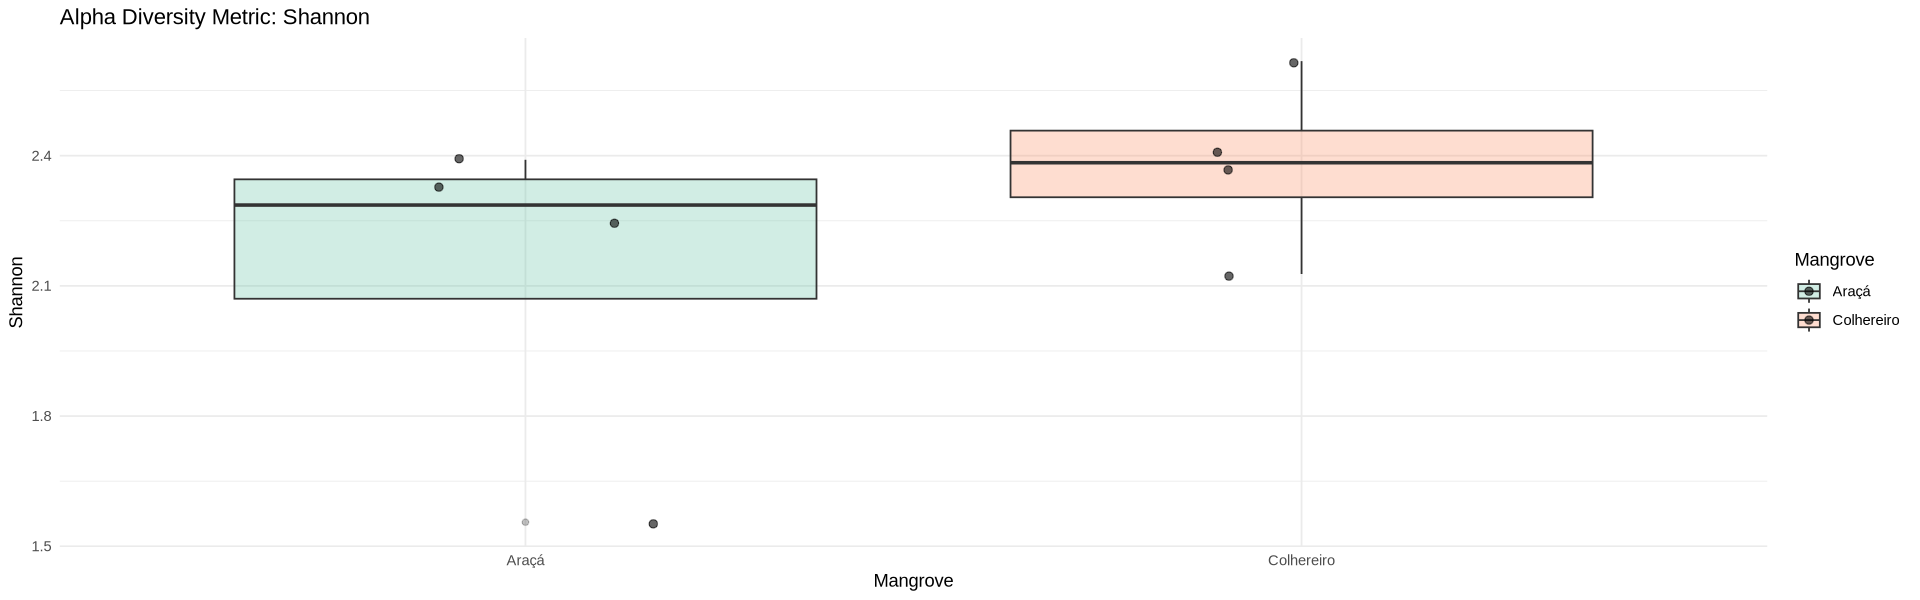

# A tibble: 1 × 9
  .y.    group1 group2        n1    n2 statistic     p p.adj p.adj.signif
* <chr>  <chr>  <chr>      <int> <int>     <dbl> <dbl> <dbl> <chr>       
1 Metric Araçá  Colhereiro     4     4         4 0.343 0.343 ns          


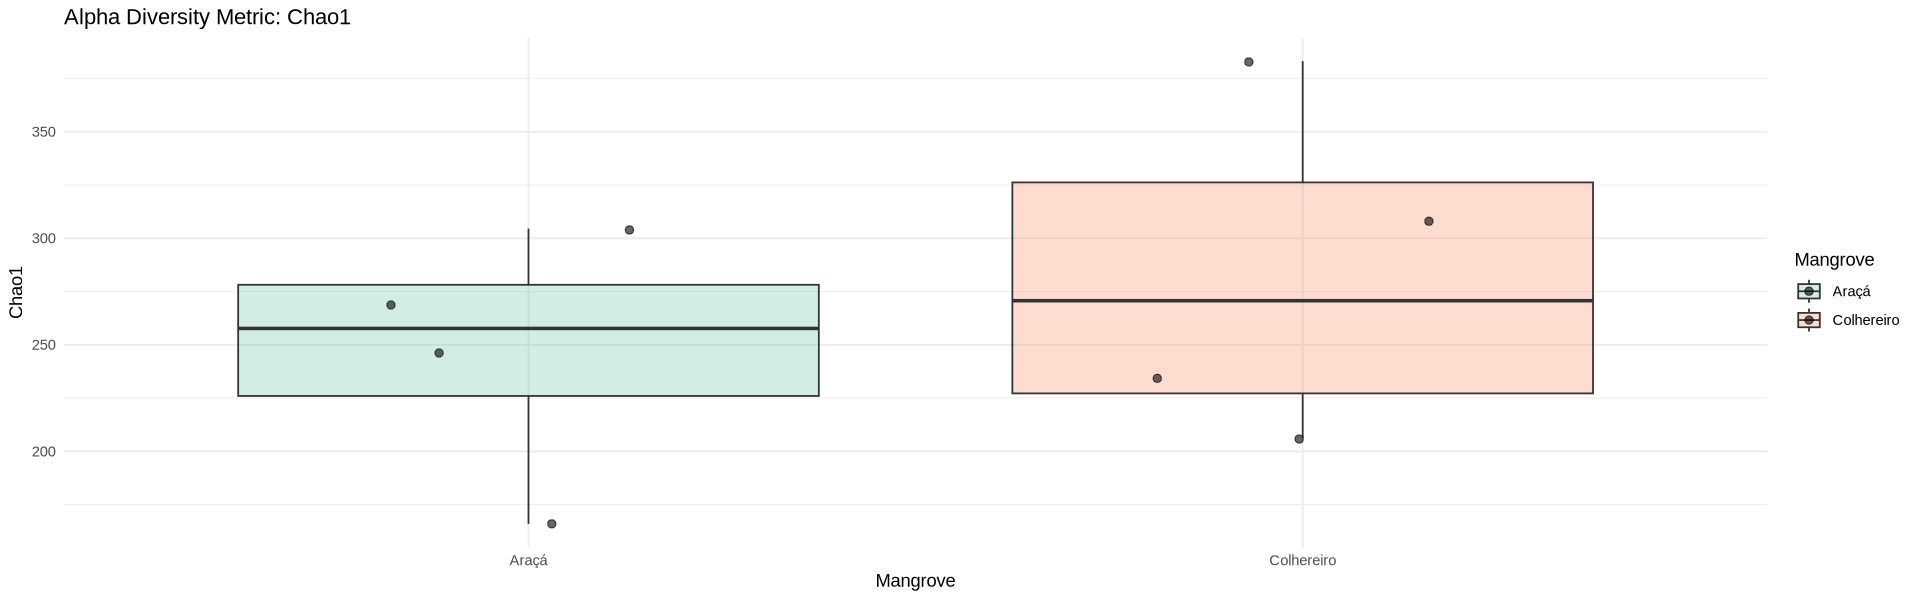

# A tibble: 1 × 9
  .y.    group1 group2        n1    n2 statistic     p p.adj p.adj.signif
* <chr>  <chr>  <chr>      <int> <int>     <dbl> <dbl> <dbl> <chr>       
1 Metric Araçá  Colhereiro     4     4         1 0.057 0.057 ns          


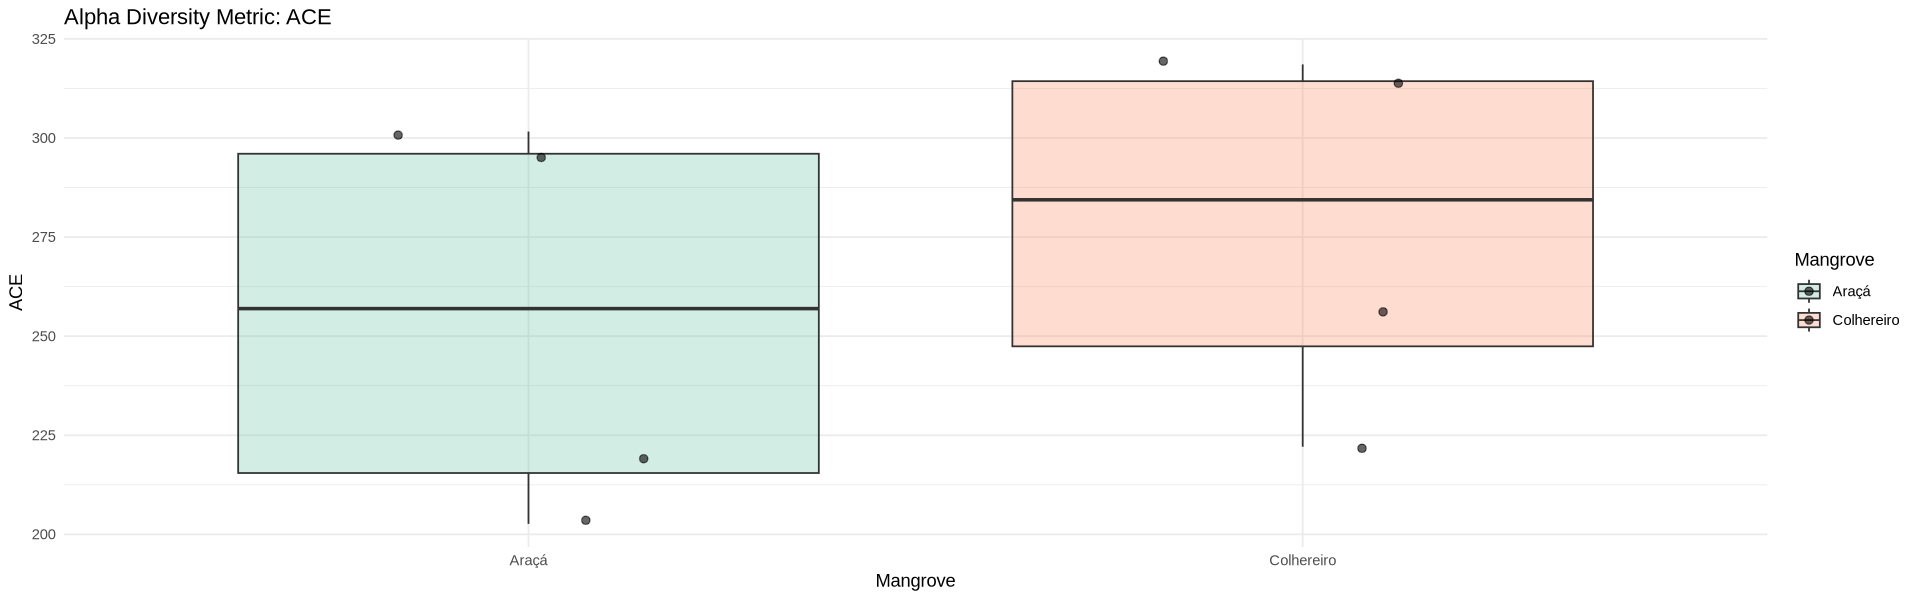

# A tibble: 1 × 9
  .y.    group1 group2        n1    n2 statistic     p p.adj p.adj.signif
* <chr>  <chr>  <chr>      <int> <int>     <dbl> <dbl> <dbl> <chr>       
1 Metric Araçá  Colhereiro     4     4        12 0.343 0.343 ns          


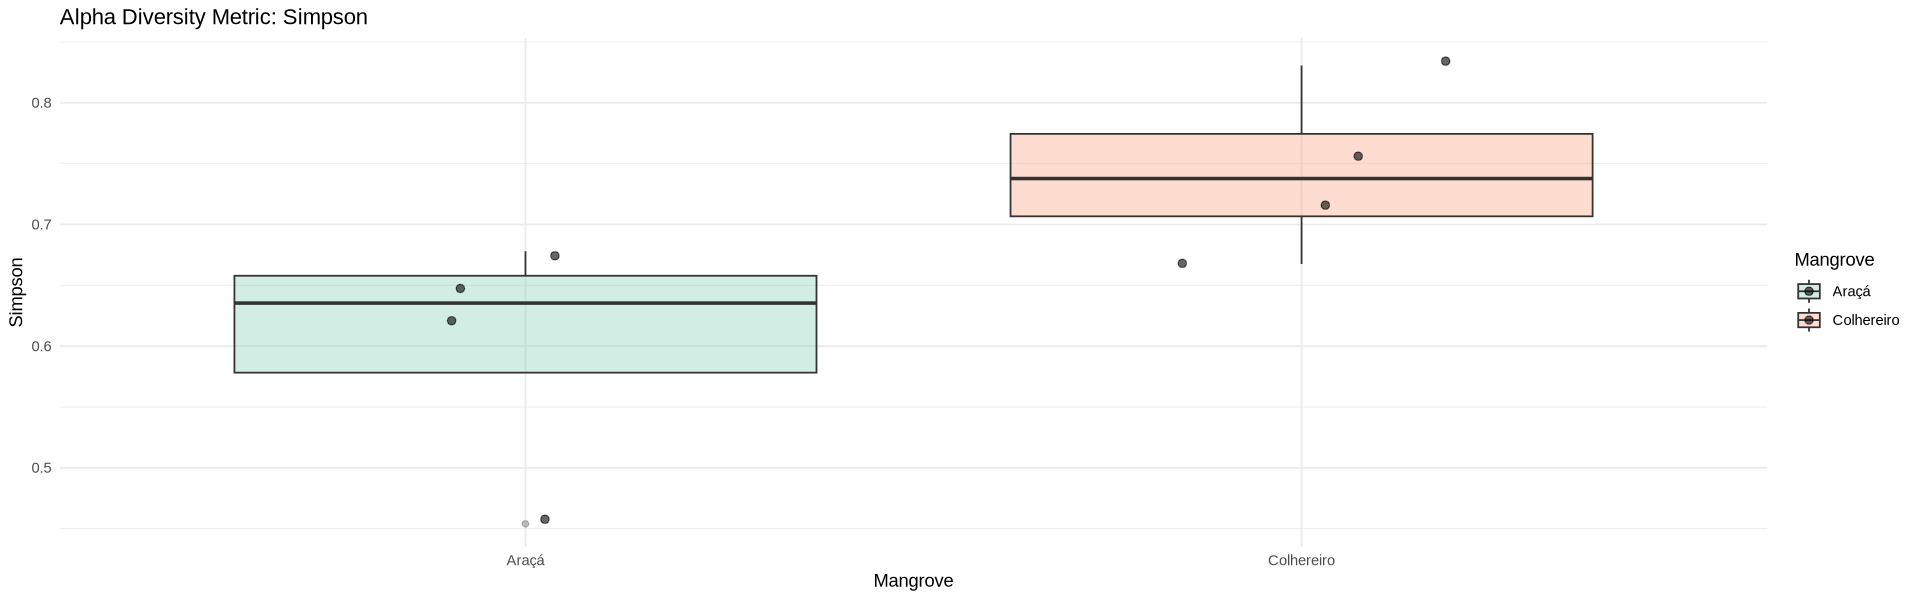

# A tibble: 1 × 9
  .y.    group1 group2        n1    n2 statistic     p p.adj p.adj.signif
* <chr>  <chr>  <chr>      <int> <int>     <dbl> <dbl> <dbl> <chr>       
1 Metric Araçá  Colhereiro     4     4        12 0.343 0.343 ns          


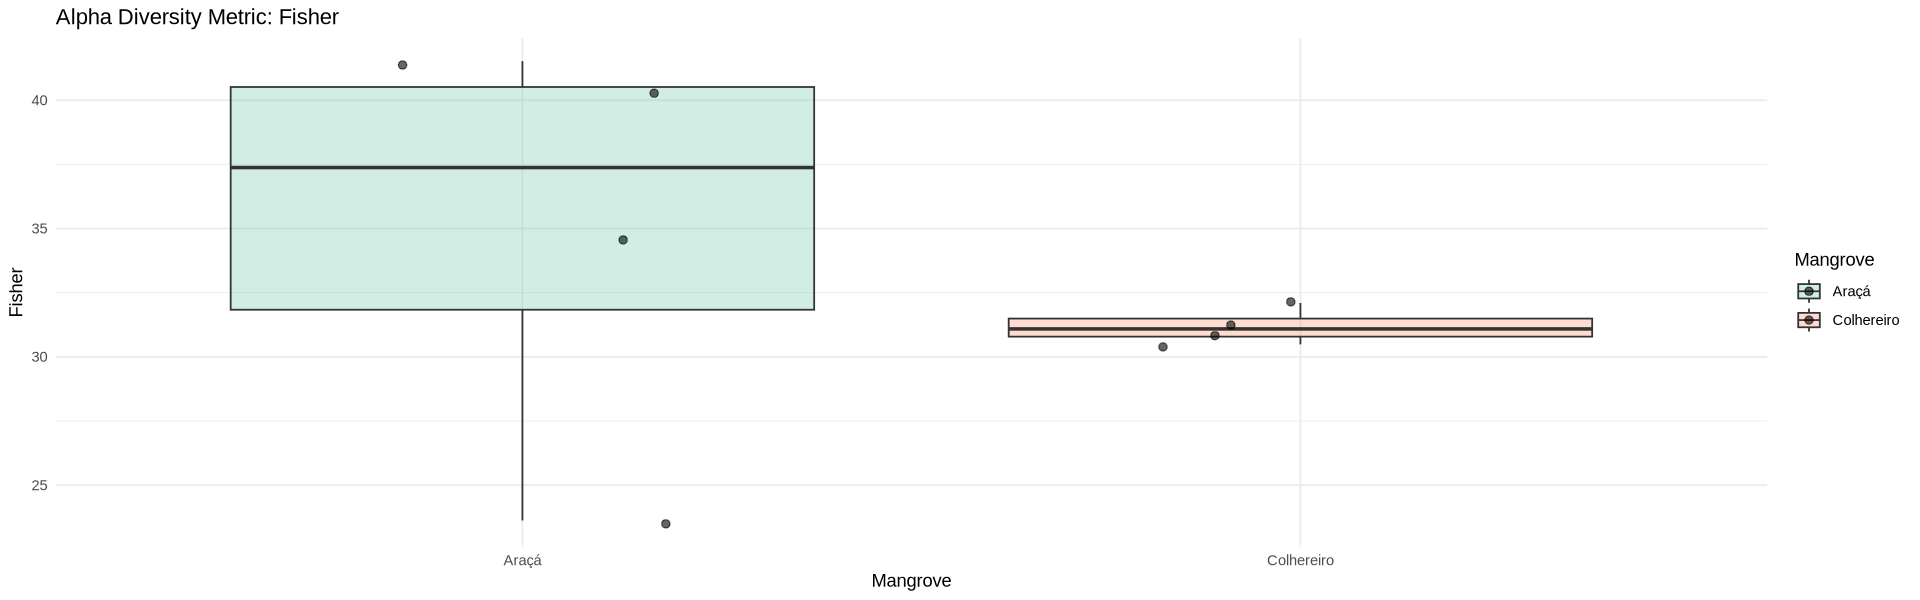

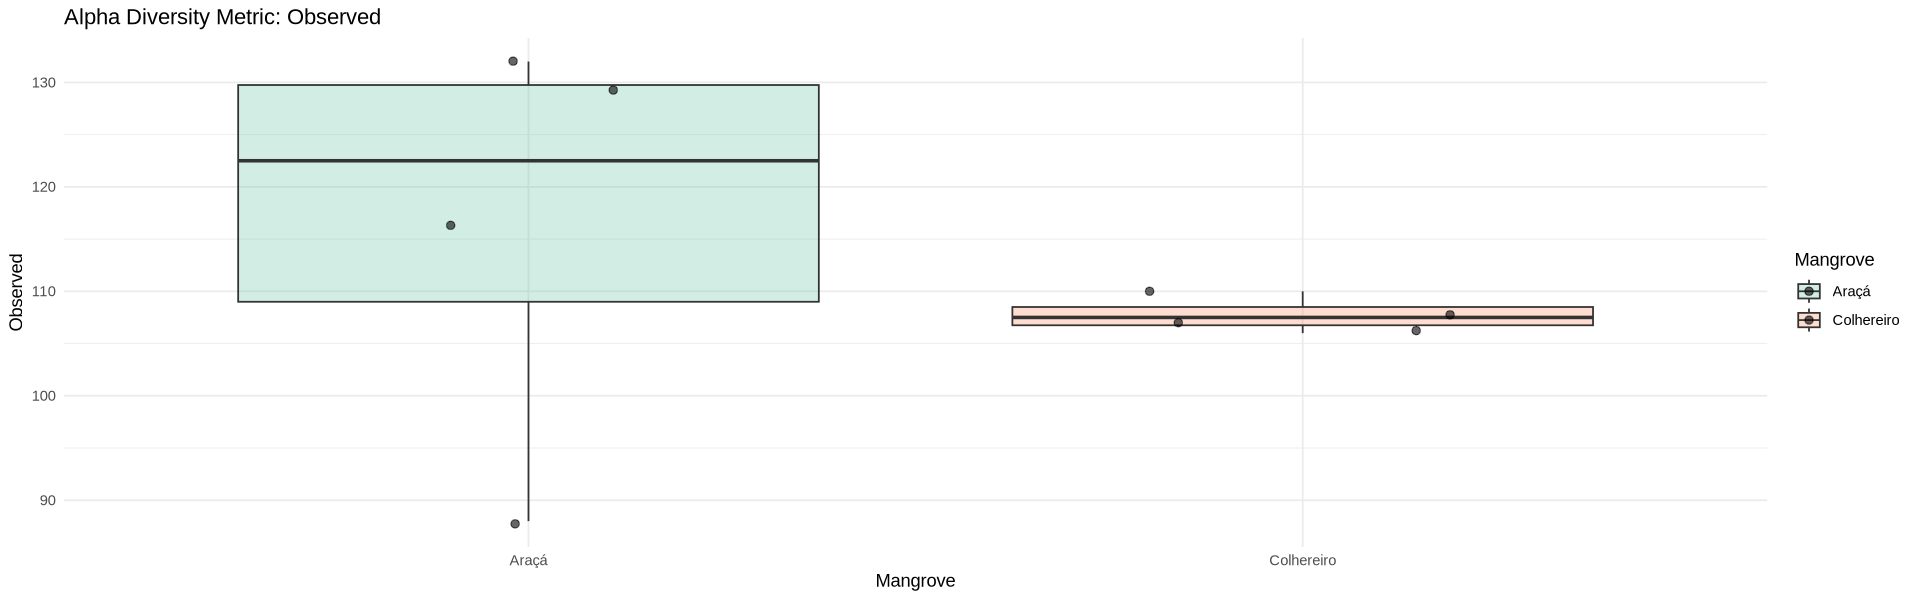

In [37]:
# Apply the function for each metric (Shannon, Chao1, ACE, Simpson, Fisher, Observed)
metrics <- c("Shannon", "Chao1", "ACE", "Simpson", "Fisher", "Observed")

# Create a list of plots
plots <- lapply(metrics, plot_alpha_diversity)

# Combine the plots into a single grid
combined_plot <- wrap_plots(plots, ncol = 2)  # Adjust ncol as needed (e.g., 2 columns)

# Print the combined plot
combined_plot <- wrap_plots(plots, ncol = 2) +
  plot_layout(guides = "collect") & theme(legend.position = "bottom")

png 
  3

pdf 
  2

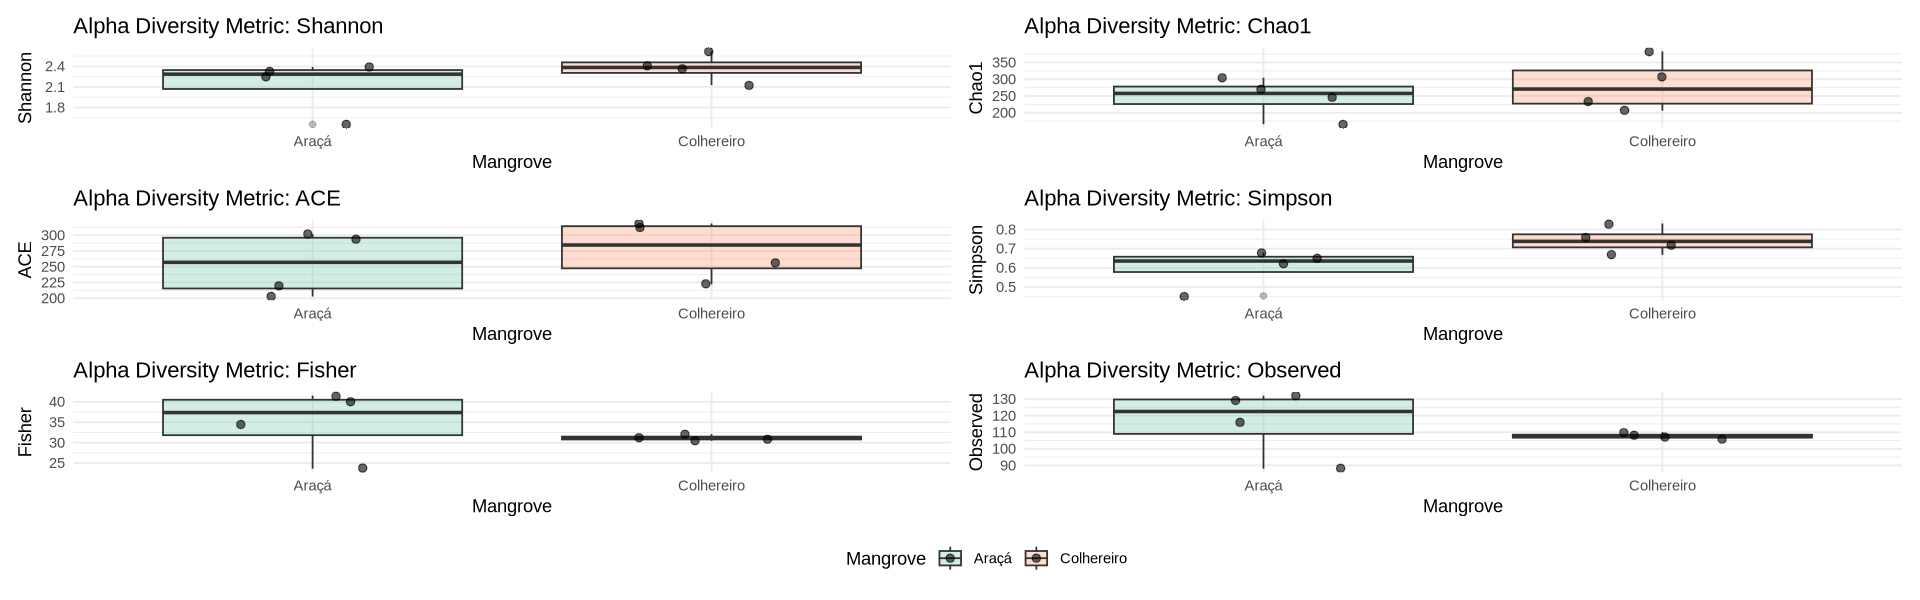

In [39]:
combined_plot

# Save the plot as a PNG file
dev.copy(png, filename = "combined_AlphaDiv_plot.png", width = 1800, height = 1400, res = 300)
dev.off()  # Close the PNG device

In [40]:
rarefied_data <- read.delim("./rarefied_data.tsv")
metadata_filtered <- read.delim("./metadata_filtered_Diversity.tsv")

head(rarefied_data)
head(metadata_filtered)

,X3PJM14,Acanthopleuribacter,Acetoanaerobium,Acetobacterium,Achromobacter,Acidaminobacter,Acidihalobacter,Acinetobacter,Actibacter,Actibacterium,⋯,Verruc.01,Vibrio,Vicingus,Vulgatibacter,wb1.P19,WCHB1.32,Woeseia,Yoonia,Zag_111,Zeaxanthinibacter
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Sample-ID1-A1,0,0,0,0,0,1,0,0,4,3,⋯,1,0,1,1,0,0,60,0,0,1
Sample-ID2-A2,1,0,0,0,0,0,0,0,3,1,⋯,0,0,1,0,0,0,42,0,0,2
Sample-ID3-A3,0,0,0,0,0,0,0,0,0,2,⋯,0,0,2,0,1,0,28,4,0,0
Sample-ID4-A4,0,0,0,0,0,0,0,0,0,3,⋯,1,3,0,0,0,0,33,0,0,1
Sample-ID5-B1,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,30,0,0,0
Sample-ID6-B2,0,1,0,0,0,1,0,1,0,3,⋯,1,11,0,0,0,0,31,0,0,0


,ID_Sample,Mangrove,Collection_month,pH,OM,P,Ca,Mg,K,H.Al,SB,CTC,V.,Number_Reads
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,Sample-ID1-A1,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,1134
2,Sample-ID2-A2,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,2971
3,Sample-ID3-A3,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,1882
4,Sample-ID4-A4,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,965
5,Sample-ID5-B1,Colhereiro,October,7.8,47,33,122,133,26.4,9,281.4,289,97,1686
6,Sample-ID6-B2,Colhereiro,October,7.8,47,33,122,133,26.4,9,281.4,289,97,2375


In [41]:
# Creating the relative abundance df
## Convert row names to a new column (ID_Sample)
rarefied_data2 <- rarefied_data %>% 
  tibble::rownames_to_column(var = "ID_Sample")

## Compute total reads per sample
total_reads <- rowSums(rarefied_data2[ , -1]) # except for the first column, with the sample codes

## Calculate relative abundance
relative_abundance <- rarefied_data2
relative_abundance[ , -1] <- sweep(rarefied_data2[ , -1], 1, total_reads, FUN = "/") * 100

## Reshape the data to have genus names as the first column
relative_abundance <- relative_abundance %>% 
  pivot_longer(-ID_Sample, names_to = "Taxa", values_to = "Relative_Abundance") %>% 
  pivot_wider(names_from = "ID_Sample", values_from = "Relative_Abundance")

head(relative_abundance)
write.table(relative_abundance, file = "relative_abundance.tsv", sep = "\t", row.names = FALSE)

Taxa,Sample-ID1-A1,Sample-ID2-A2,Sample-ID3-A3,Sample-ID4-A4,Sample-ID5-B1,Sample-ID6-B2,Sample-ID7-B3,Sample-ID8-B4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X3PJM14,0.0000000,0.1046025,0,0,0,0.0000000,0,0.0000000
Acanthopleuribacter,0.0000000,0.0000000,0,0,0,0.1046025,0,0.1046025
Acetoanaerobium,0.0000000,0.0000000,0,0,0,0.0000000,0,0.1046025
Acetobacterium,0.0000000,0.0000000,0,0,0,0.0000000,0,0.1046025
Achromobacter,0.0000000,0.0000000,0,0,0,0.0000000,0,0.1046025
Acidaminobacter,0.1046025,0.0000000,0,0,0,0.1046025,0,0.1046025


In [42]:
## Calculates Bray-Curtis distances between samples
bray_curtis_dist <- vegan::vegdist(t(relative_abundance[, -1]), method = "bray")
bray_curtis_pcoa <- ecodist::pco(bray_curtis_dist) # Performs Principal Coordinate Analysis (PCoA) on the Bray-Curtis dissimilarity matrix to obtain principal coordinate axes
head(bray_curtis_dist)
head(bray_curtis_pcoa)

[1] 0.2479079 0.2395397 0.2405858 0.3211297 0.4403766 0.3284519

,X1,X2,X3,X4,X5,X6,X7,X8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sample-ID1-A1,-0.16405811,0.03922187,0.02556941,0.11429879,0.07254871,-0.017786920,0.013265072,0
Sample-ID2-A2,-0.21416953,-0.05341926,-0.09844230,0.02993290,-0.09170010,0.001631612,-0.009396803,0
Sample-ID3-A3,-0.12019255,0.11994093,0.08238933,-0.06597155,-0.02226981,-0.067537616,-0.028543466,0
Sample-ID4-A4,-0.13069804,0.01853647,-0.06288121,-0.09087374,0.06874816,0.062247541,0.012042105,0
Sample-ID5-B1,0.05531746,-0.10079804,0.07178692,-0.02231113,-0.03046998,-0.009601085,0.075834132,0
Sample-ID6-B2,0.20537611,-0.13135741,-0.05988482,-0.01129995,0.04350028,-0.069106462,-0.029133269,0
Sample-ID7-B3,0.08436413,-0.06881938,0.09341385,0.02113019,-0.01395583,0.081504246,-0.048936967,0
Sample-ID8-B4,0.28406053,0.17669483,-0.05195117,0.02509449,-0.02640143,0.018648685,0.014869196,0


In [43]:
### Creates a df to store the PCoA results and assigns the first three principal coordinate axes to columns in the data frame
bray_curtis_pcoa_df <- data.frame(pcoa1 = bray_curtis_pcoa$vectors[,1], 
                                  pcoa2 = bray_curtis_pcoa$vectors[,2],
                                  pcoa3 = bray_curtis_pcoa$vectors[,3]) 
bray_curtis_pcoa_df$ID_Sample <- colnames(relative_abundance)[-1] # Assigns sample IDs as a new column in the data frame
dist_metadata <- merge(metadata_filtered, bray_curtis_pcoa_df, by = "ID_Sample") # Merges the metadata with the PCoA results based on sample IDs.
head(bray_curtis_pcoa_df)
head(dist_metadata)

,pcoa1,pcoa2,pcoa3,ID_Sample
,<dbl>,<dbl>,<dbl>,<chr>
1,-0.16405811,0.03922187,0.02556941,Sample-ID1-A1
2,-0.21416953,-0.05341926,-0.09844230,Sample-ID2-A2
3,-0.12019255,0.11994093,0.08238933,Sample-ID3-A3
4,-0.13069804,0.01853647,-0.06288121,Sample-ID4-A4
5,0.05531746,-0.10079804,0.07178692,Sample-ID5-B1
6,0.20537611,-0.13135741,-0.05988482,Sample-ID6-B2


,ID_Sample,Mangrove,Collection_month,pH,OM,P,Ca,Mg,K,H.Al,SB,CTC,V.,Number_Reads,pcoa1,pcoa2,pcoa3
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Sample-ID1-A1,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,1134,-0.16405811,0.03922187,0.02556941
2,Sample-ID2-A2,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,2971,-0.21416953,-0.05341926,-0.09844230
3,Sample-ID3-A3,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,1882,-0.12019255,0.11994093,0.08238933
4,Sample-ID4-A4,Araçá,September,7.3,10,24,58,56,12.6,9,126.6,135,94,965,-0.13069804,0.01853647,-0.06288121
5,Sample-ID5-B1,Colhereiro,October,7.8,47,33,122,133,26.4,9,281.4,289,97,1686,0.05531746,-0.10079804,0.07178692
6,Sample-ID6-B2,Colhereiro,October,7.8,47,33,122,133,26.4,9,281.4,289,97,2375,0.20537611,-0.13135741,-0.05988482


In [44]:
write.table(bray_curtis_pcoa_df, file = "PCoA_values_samples.tsv", sep = "\t", row.names = FALSE)

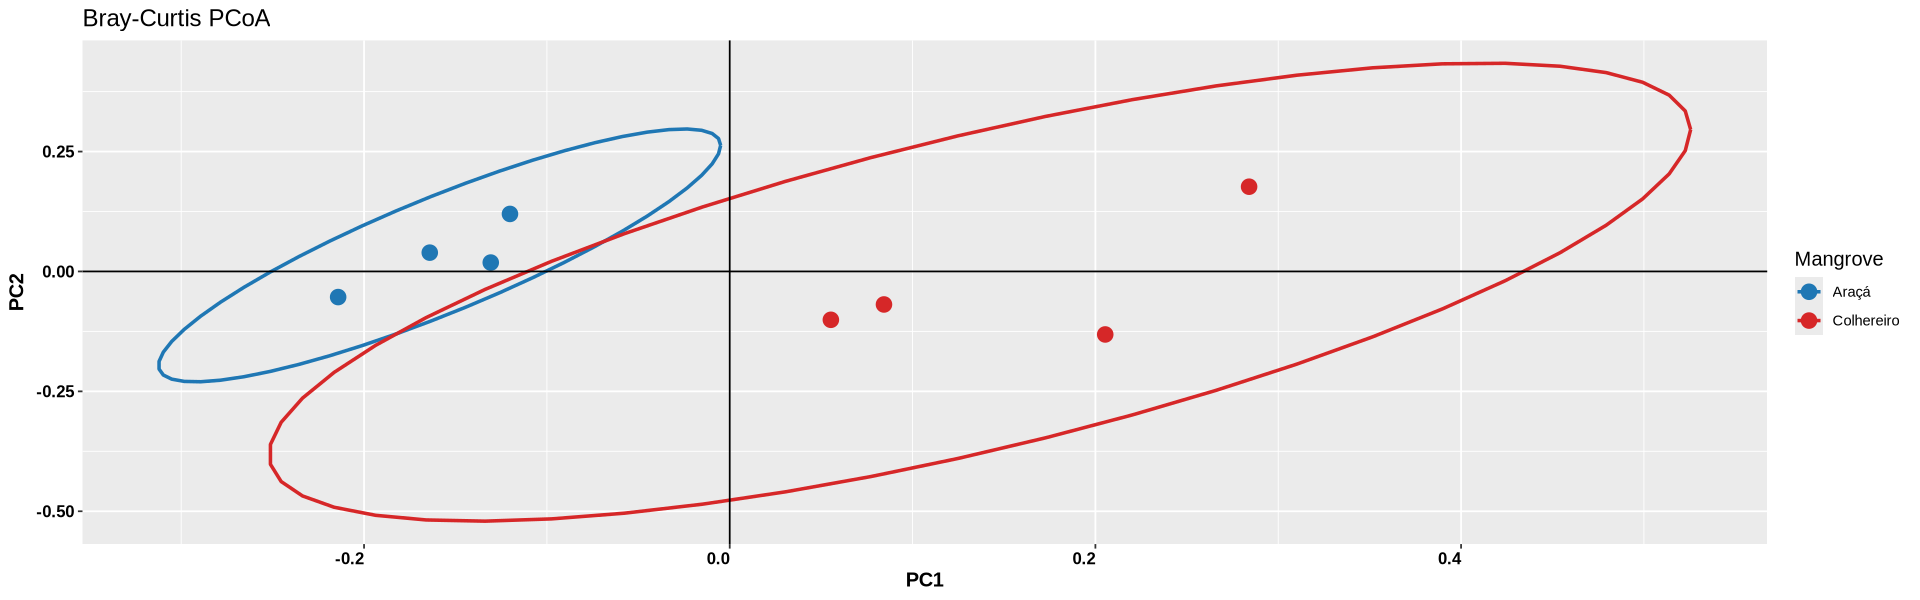

In [49]:
bray_curtis_mangrove <- ggplot(data = dist_metadata, aes(x = pcoa1, y = pcoa2, color = Mangrove)) +
  geom_point(size = 4) +   
  stat_ellipse(aes(group = Mangrove), type = "t", linetype = "solid", size = 1) +  # Add ellipses
  geom_hline(yintercept = 0) +
  geom_vline(xintercept = 0) +
  scale_color_manual(values = c("Araçá" = "#1f77b4", "Colhereiro" = "#d62728")) +
  labs(x = "PC1",
       y = "PC2", 
       title = "Bray-Curtis PCoA") +
  theme(title = element_text(size = 12), 
        axis.text.x = element_text(hjust = 1, size = 10, colour = "black", face="bold"),
        axis.text.y = element_text(hjust = 1, size = 10, colour = "black", face="bold"),
        axis.text = element_text(size = 12, colour = "black", face="bold"),
        axis.title = element_text(size = 12, colour = "black", face="bold"))
bray_curtis_mangrove

# Save the plot as a PNG file
ggsave("bray_curtis_PCoA.png", plot = bray_curtis_mangrove, width = 6, height = 4, dpi = 300)

In [53]:
colnames(ReadCounts_TaxAnnotation)
colnames(metadata_filtered)

[1] "ID_Sample"           "id"                  "count"              
 [4] "Kingdom"             "Phylum"              "Class"              
 [7] "Order"               "Family"              "Genus"              
[10] "Species"             "total_aligned"       "RelativeAbundance"  
[13] "ID_Sample.y"         "Mangrove"            "Collection_month"   
[16] "pH"                  "OM"                  "P"                  
[19] "Ca"                  "Mg"                  "K"                  
[22] "H.Al"                "SB"                  "CTC"                
[25] "V."                  "Number_Reads"        "AlignmentEfficiency"

[1] "ID_Sample"        "Mangrove"         "Collection_month" "pH"              
 [5] "OM"               "P"                "Ca"               "Mg"              
 [9] "K"                "H.Al"             "SB"               "CTC"             
[13] "V."               "Number_Reads"

In [59]:
plot_relative_abundance <- function(count_data, metadata, tax_level, output_file) {
  
  # Aggregate counts by tax_level and Mangrove
  df_tax <- count_data %>%
    group_by_at(vars(all_of(c(tax_level, "ID_Sample", "Mangrove")))) %>%
    summarise(count = sum(count), .groups = "drop")
  
  # Aggregate counts across samples by Mangrove and tax_level
  df_tax_sum <- df_tax %>%
    group_by(Mangrove, !!sym(tax_level)) %>%
    summarise(count = sum(count), .groups = "drop") %>%
    rename(Taxa = !!sym(tax_level))
  
  # Reshape to wide format: Mangrove x Taxa
  cast_data_tax <- reshape2::acast(df_tax_sum, Mangrove ~ Taxa, value.var = "count", fill = 0)
  
  # Calculate relative abundance (%) per Mangrove (row sums)
  relative_abundance_tax <- sweep(cast_data_tax, 1, rowSums(cast_data_tax), FUN = "/") * 100
  
  # Melt back to long format
  df_relab_tax <- reshape2::melt(relative_abundance_tax, varnames = c("Mangrove", "Taxa"), value.name = "RelativeAbundance")
  
  # Filter out zero abundance taxa
  df_relab_tax <- df_relab_tax %>% filter(RelativeAbundance > 0)
  
  # Filter taxa with relative abundance > 1.5%
  df_relab_tax_filt <- df_relab_tax %>% filter(RelativeAbundance > 1.5)
  
  # Calculate "Others" to reach 100%
  df_sum <- df_relab_tax_filt %>% 
    group_by(Mangrove) %>% 
    summarise(TotalAbundance = sum(RelativeAbundance))
  
  df_others <- df_sum %>%
    mutate(Taxa = "Others",
           RelativeAbundance = 100 - TotalAbundance) %>%
    select(Mangrove, Taxa, RelativeAbundance)
  
  df_relab_tax_filt <- bind_rows(df_relab_tax_filt, df_others)
  
  # Factor levels for Taxa with "Others" last
  taxa_levels <- c(setdiff(unique(df_relab_tax_filt$Taxa), "Others"), "Others")
  df_relab_tax_filt$Taxa <- factor(df_relab_tax_filt$Taxa, levels = taxa_levels)
  
  # Define color palette simply from custom_colors vector
  unique_taxa <- setdiff(taxa_levels, "Others")
  color_palette <- setNames(custom_colors[seq_along(unique_taxa)], unique_taxa)
  color_palette["Others"] <- "black"
  
  # Plot
  tax_plot <- ggplot(df_relab_tax_filt,
                     aes(x = Mangrove, y = RelativeAbundance, fill = Taxa)) +
    geom_bar(stat = "identity", position = "stack", color = "black") +
    scale_fill_manual(values = color_palette) +
    labs(x = "Mangrove", y = "Relative Abundance (%)", title = paste("Relative Abundance at", tax_level, "Level")) +
    theme_bw() +
    theme(axis.title.x = element_text(size = 20, face = "bold"),
          axis.text.x = element_text(size = 16, face = "bold"),
          axis.title.y = element_text(size = 20, face = "bold"),
          axis.text.y = element_text(size = 16, face = "bold"),
          legend.title = element_blank(),
          legend.text = element_text(size = 12, face = "bold"),
          axis.ticks.x = element_blank(),
          panel.grid = element_blank(),
          legend.position = "right",
          legend.key.size = unit(0.5, "cm")) +
    guides(fill = guide_legend(ncol = 1))
  
  ggsave(output_file, plot = tax_plot, width = 10, height = 6, dpi = 300)
  
  return(tax_plot)
}

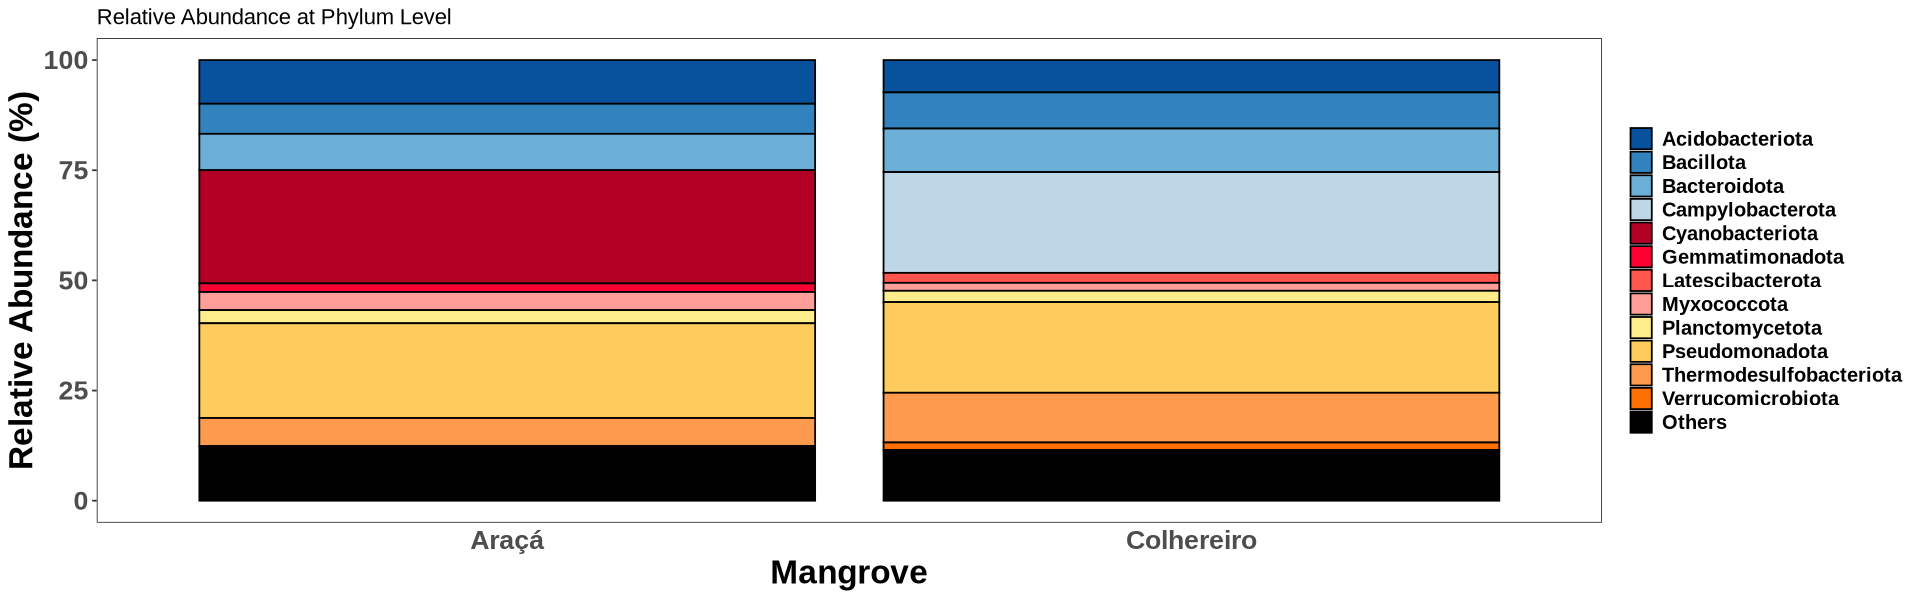

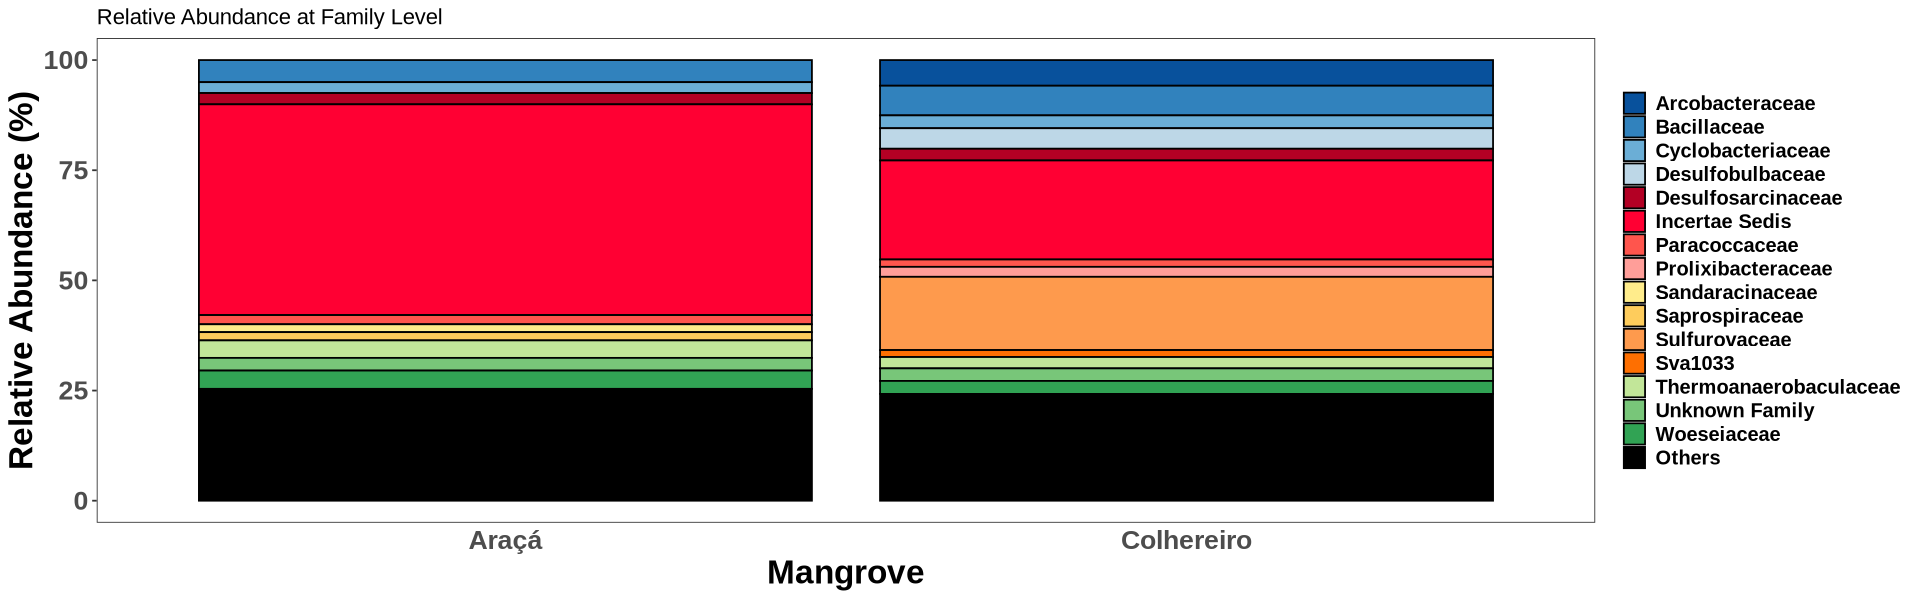

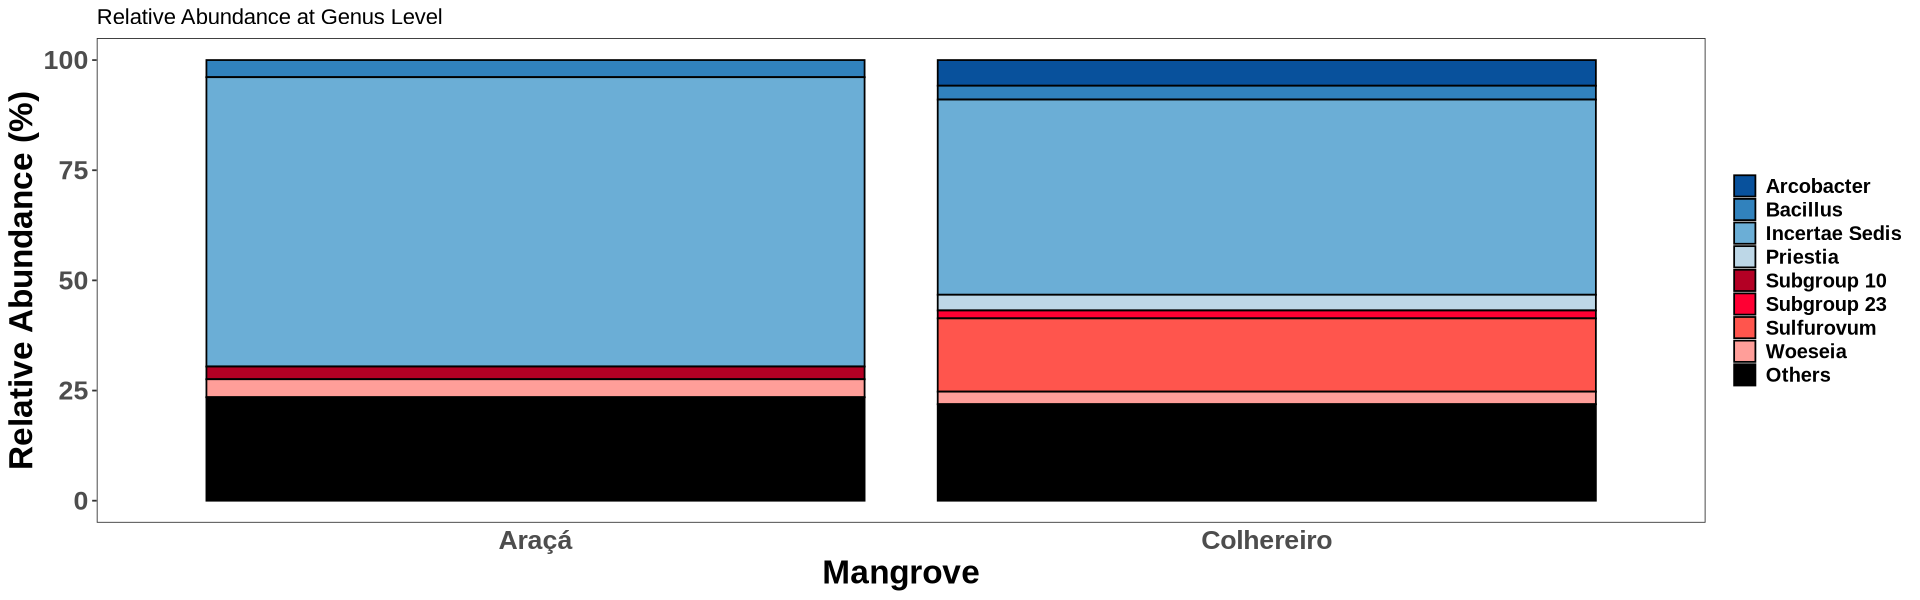

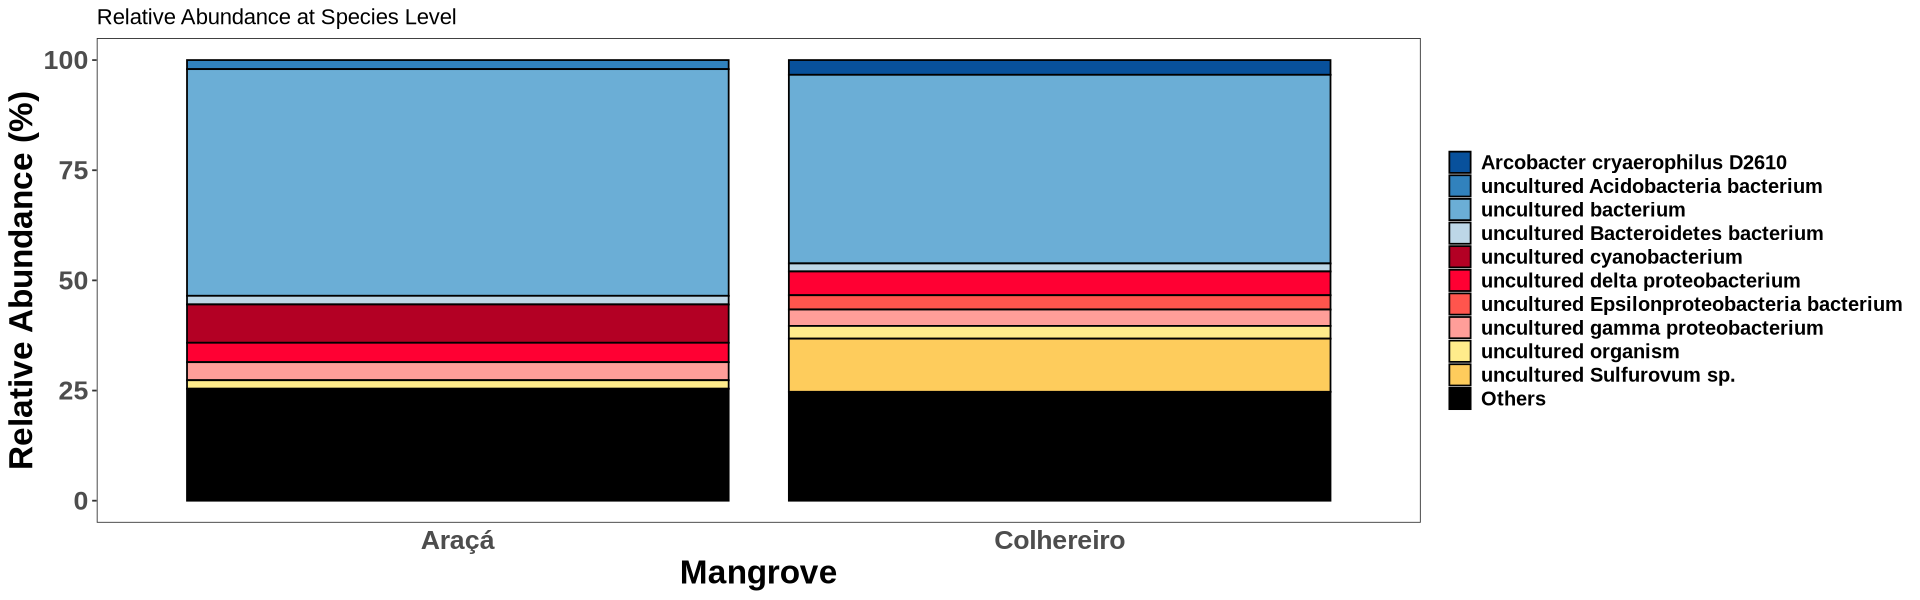

In [60]:
# Define your custom colors for non-Phylum taxa before calling the function

## Create color palette
purples <- brewer.pal(n = 5, name = "BuPu")[-c(1:4)] # taking a few colors from the RColorBrewer Package
blues <- rev(brewer.pal(n = 5, name = "Blues")[-1])
greens <- brewer.pal(n = 5, name = "YlGn")[-1]
oranges <- c("#FFEC8B", "#FECC5C", "#fe9a4d", "#fe6f01") # appending some nice oranges, reds, purples, beiges and aquamarines
reds <- c("#b30024", "#ff0033", "#ff554d", "#ff9e99")
purples <- append(purples, c("#ac39ac", "#cc66cc", "#ffb3ff"))
beiges <- c("#999966", "#adad85", "#ccccb3")
aquamarines <- c("#25a696", "#43d6c5", "#96e8df")
pinks <- c("#9F2B68", "#F33A6A")
gray <- c("#808080")
custom_colors <- c(blues, reds, oranges, greens, purples, rev(beiges), aquamarines, pinks) # combinig all colors in a single vector

plot_relative_abundance(ReadCounts_TaxAnnotation, metadata_filtered, "Phylum", "Phylum_Relative_Abundance.png")
plot_relative_abundance(ReadCounts_TaxAnnotation, metadata_filtered, "Family", "Family_Relative_Abundance.png")
plot_relative_abundance(ReadCounts_TaxAnnotation, metadata_filtered, "Genus", "Genus_Relative_Abundance.png")
plot_relative_abundance(ReadCounts_TaxAnnotation, metadata_filtered, "Species", "Species_Relative_Abundance.png")


In [ ]:
ggsave("staphspp_plot_relabund.png", plot = staph_plot, width = 10, height = 6, dpi = 300)